# Recitation 0.1A - Part 1: Python Fundamentals




--






TA: Ishita Gupta (ishitag@cs.cmu.edu)


# Table of Contents:

1. Why do we study this?
2. Installing and Importing libraries
3. Built-in datatypes, dynamic typing
4. Function calls (yay!)
5. Lambda functions
6. Classes
7. Error Handling
8. File System


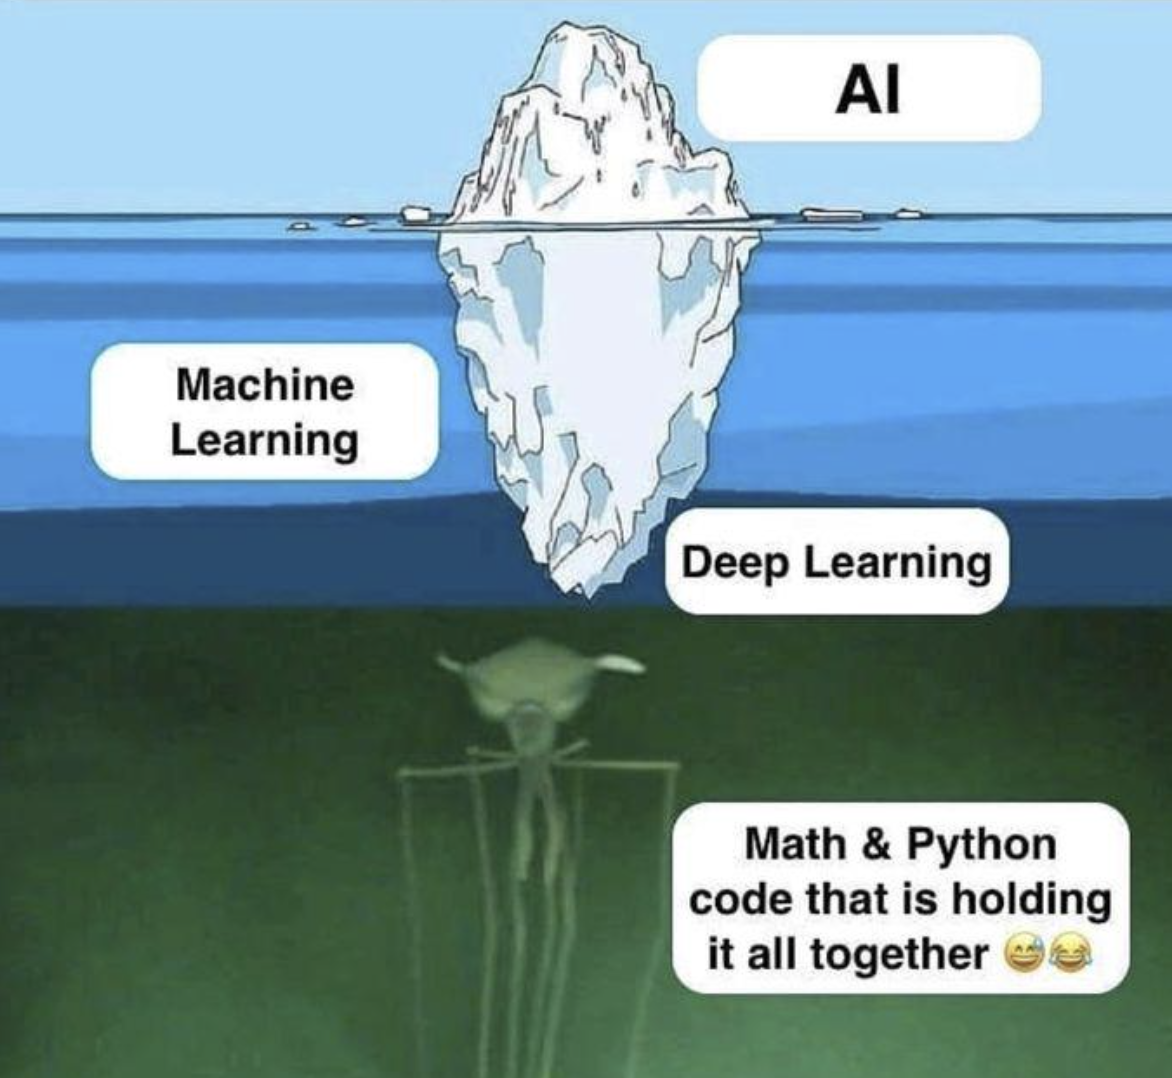

##Why Python?

1. All DeepLearning code in the industry as well as in research is written in Python!

that's a good enough reason to know :-)

However, it's mostly due to the large support that Python has from libraries which is what makes this language so powerful

Examples of these libraries include: numpy, pytorch, tensorflow, pandas, matplotlib

The above libraries can be imported as is:

# Installing and importing the libraries

NumPy mean: 2.0
Torch tensor squared: tensor([1., 4., 9.])
Defined torchvision transform: Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


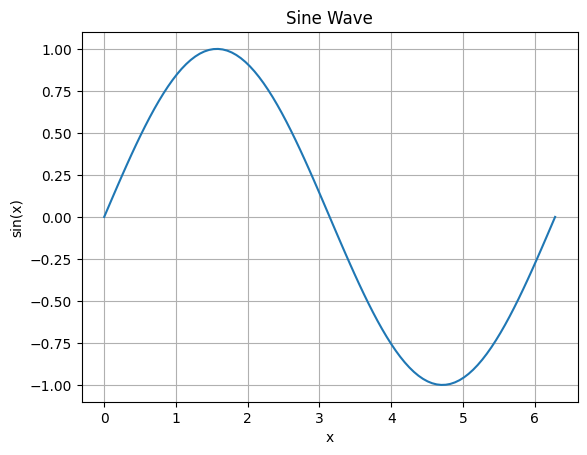

In [ ]:
# !pip install numpy matplotlib torch torchvision

import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For plotting
import torch                    # Core deep learning library
import torchvision.transforms as transforms  # For image transformations
import os                       # For file operations
import time                     # For timing experiments

# NumPy
arr = np.array([1.0, 2.0, 3.0])
print("NumPy mean:", np.mean(arr))

# PyTorch
tensor = torch.tensor([1.0, 2.0, 3.0])
print("Torch tensor squared:", tensor ** 2)

# Torchvision: Defining a common image transform
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
print("Defined torchvision transform:", transform)

# Matplotlib: example: Plotting a sine wave
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)
plt.show()

Note: **NumPy vs PyTorch Tensors**

 - **Device Support**: NumPy arrays run only on CPU, whereas PyTorch tensors can operate on both CPU and GPU (`.to('cuda')`).
 - **Autograd**: PyTorch tensors support automatic differentiation (`requires_grad=True`), enabling gradient-based learning  (don't worry if you don't understand this right now, you'll be learning this in lectures and will also get to do "autograd" versions of the assignments :-))
 - **Deep Learning Integration**: PyTorch tensors are designed to work seamlessly with neural network modules (`nn.Linear`, `nn.Conv2d`), loss functions, and optimizers.
 - **Interoperability**: PyTorch and NumPy interoperate easily—convert NumPy arrays to tensors using `torch.from_numpy()` and convert tensors to NumPy using `.numpy()` (when on CPU).

So we can use NumPy for general numerical tasks and PyTorch tensors when building and training deep learning models.


# Data types & Data structures


In [ ]:
# Numbers
integer = 42
floating = 3.14
print("Integer:", integer, "| Type:", type(integer))
print("Float:", floating, "| Type:", type(floating))

# Boolean
flag = True
print("Boolean:", flag, "| Type:", type(flag))

# String
name = "IDL Recitation"
print("String:", name, "| Type:", type(name))


####### Data Structures: List, Tuple, Dictionary, Set ##########

# List
grades = [85, 90, 92]
print("List:", grades, "| First element:", grades[0])

# Tuple (Immutable)
coords = (10, 20)
print("Tuple:", coords)

# Below assignment is invalid as tuples in python are immutable.
# coords[0] = 5

# Dictionary (Key-Value Pairs)
student = {"name": "Alice", "score": 95}
print("Dictionary:", student)
print("Student name:", student["name"])

# Set (Unique values)
unique_nums = {1, 2, 3, 2}
print("Set (no duplicates):", unique_nums)

Integer: 42 | Type: <class 'int'>
Float: 3.14 | Type: <class 'float'>
Boolean: True | Type: <class 'bool'>
String: IDL Recitation | Type: <class 'str'>
List: [85, 90, 92] | First element: 85
Tuple: (10, 20)
Dictionary: {'name': 'Alice', 'score': 95}
Student name: Alice
Set (no duplicates): {1, 2, 3}


Note: Python is **dynamically typed**, meaning you don't need to declare variable types explicitly and the type is actually inferred at runtime. Example:

In [ ]:
x = 5       # int
x = 5.0     # now a float
x = 'five'  # now a string

# Numbers

In [ ]:
x = 17 / 3  # returns a float

print(f"x = {x}")


x = 17 // 3  # floor division discards the fractional part

print(f"x = {x}")

x = 5.666666666666667
x = 5


# Function calls

*args allows you to pass a variable number of positional arguments.

**kwargs allows you to pass a variable number of named keyword arguments.

This feature is unique to Python compared to many statically typed languages where function arguments must be fixed.

In [ ]:
def print_info(*args, **kwargs):
    print("Positional arguments (args):", args)
    print("Keyword arguments (kwargs):", kwargs)

print_info("Deep", "Learning", course="IDL", year=2025)
print_info("Deep", "Learning", year=2025)
print_info("Deep", "Learning", year=2025, course="IDL", students=400)

Positional arguments (args): ('Deep', 'Learning')
Keyword arguments (kwargs): {'course': 'IDL', 'year': 2025}
Positional arguments (args): ('Deep', 'Learning')
Keyword arguments (kwargs): {'year': 2025}
Positional arguments (args): ('Deep', 'Learning')
Keyword arguments (kwargs): {'year': 2025, 'course': 'IDL', 'students': 400}


In [ ]:
def describe_event(*args, **kwargs):
    print("Event details:", args)
    print("Metadata:", kwargs)

describe_event("Hackathon", "24 hours", team_size=4, location="CMU")

Event details: ('Hackathon', '24 hours')
Metadata: {'team_size': 4, 'location': 'CMU'}


# Lambda Functions

In [ ]:
def square(x):
    return x * x

square_lambda = lambda x: x * x

print("Using def:", square(5))
print("Using lambda:", square_lambda(5))

Using def: 25
Using lambda: 25


In [ ]:
# Passing the lamba function as an argument

nums = [1, 2, 3, 4]
squared = list(map(lambda x: x**2, nums))  # here, the sorting "key" for the map is the lambda
print(squared)

[1, 4, 9, 16]


# Variables are passed by reference

In [ ]:
def modify_list(my_list):
    my_list.append(100)

data = [1, 2, 3]
print("Original list:", data)
modify_list(data)
print("Modified list:", data)

Original list: [1, 2, 3]
Modified list: [1, 2, 3, 100]


# Classes

In [ ]:
class Student:
    def __init__(self, name, score):
        self.name = name
        self.score = score

    def greet(self):
        print(f"Hi, I'm {self.name} and I scored {self.score} in Deep Learning!")

# Creating an object
s = Student("Alice", 95)
s.greet()

Hi, I'm Alice and I scored 95 in Deep Learning!


# Error Handling

In [ ]:
def divide(a, b):
    try:
        result = a / b
    except ZeroDivisionError:
        print("Error: Cannot divide by zero!")
        result = None
    finally:
        print("Execution completed.")
    return result

print("Result 1:", divide(10, 2))
print("Result 2:", divide(5, 0))

Execution completed.
Result 1: 5.0
Error: Cannot divide by zero!
Execution completed.
Result 2: None


**Some errors that you'll likely run into:**

* **FileNotFoundError**: trying to load a missing model or dataset

* **KeyError**: accessing a missing key in a config or label map

* **ValueError**: bad input dimensions or hyperparameter values

* **RuntimeError**: PyTorch memory errors, especially on GPU

* **TypeError**: passing a tensor when a float was expected

# File System

In [ ]:
import os

# Create a new folder
folder_name = "experiment_logs"
os.makedirs(folder_name, exist_ok=True)  # avoids error if folder already exists
print(f"Folder '{folder_name}' created.")

# Write to a file inside that folder
file_path = os.path.join(folder_name, "log.txt")
with open(file_path, "w") as f:
    f.write("This is the first log.\n")
    f.write("This is the second log.\n")

# Read the file content
with open(file_path, "r") as f:
    content = f.read()
    print("\nFile content:")
    print(content)

# List all files in the folder
print("\nFiles in folder:")
print(os.listdir(folder_name))

# Check if the file exists
if os.path.exists(file_path):
    print(f"\n'{file_path}' exists.")

# Delete the file
os.remove(file_path)
print(f"\n'{file_path}' deleted.")

Folder 'experiment_logs' created.

File content:
This is the first line.
This is the second line.


Files in folder:
['log.txt']

'experiment_logs/log.txt' exists.

'experiment_logs/log.txt' deleted.


## 📘 Further Reading

[Official Python Tutorial](https://docs.python.org/3/tutorial/index.html) — A great place to strengthen your Python fundamentals!



**Happy (Deep) Learning! :-)**